# Data Model and Database Implementation


* [The Datamodel](#datamodel)
    * [Students Table](#studenttable)
    * [Colleges Table](#collegetable)
    * [Application Form Table](#applformtable)
* [Datamodel Implementation](#datamodelimpl)
    * [Generating Mock Data](#mockdata)
    * [Simulating Missing Data](#missingdata)
* [Saving Scraped Data](#saving)
    * [Part 1 - Student Data](#studentdata)
    * [Part 2 - Application Data](#applicationdata)
    * [Merged Data](#mergeddata)
* [First Scraping Attempt](#scrape1)


<a id="datamodel"></a>
## The Datamodel

Based on our research of key factors ([example](http://www.nacacnet.org/studentinfo/articles/Pages/Factors-in-the-Admission-Decision.aspx)), the first thing we did was determine an appropriate datamodel in order to standardize scraping from potentially multiple sources and allow parallel development between scraping and classification. There are of course limits to pre-determining the model. We are unable to get a complete picture of a given candidate, such as recommendation letters as it is impossible to get data for this as well as being difficult quantify. We were able to find a data source for the vast majority of the factors we identified and did not discover any additional sources for factors we did not already identify. The breadth of our factors is already substantially wider than the two dimensions of Test Scores and GPA found on [Naviance](http://www.naviance.com/), the most popular current site for predicting admissions.

We distinguish three tables:
- A students table contains all academic and personal data of a particular student (scores, gender, etc)
- A college table contains all information of a university (acceptance rate, public/private, etc)
- An application form table contains application-specific data for a particular student in a particular university, for example and most importantly, the result of the decision procedure

When these three tables are merged, a single row of the merged result represents a complete college application ready for classification and analysis.

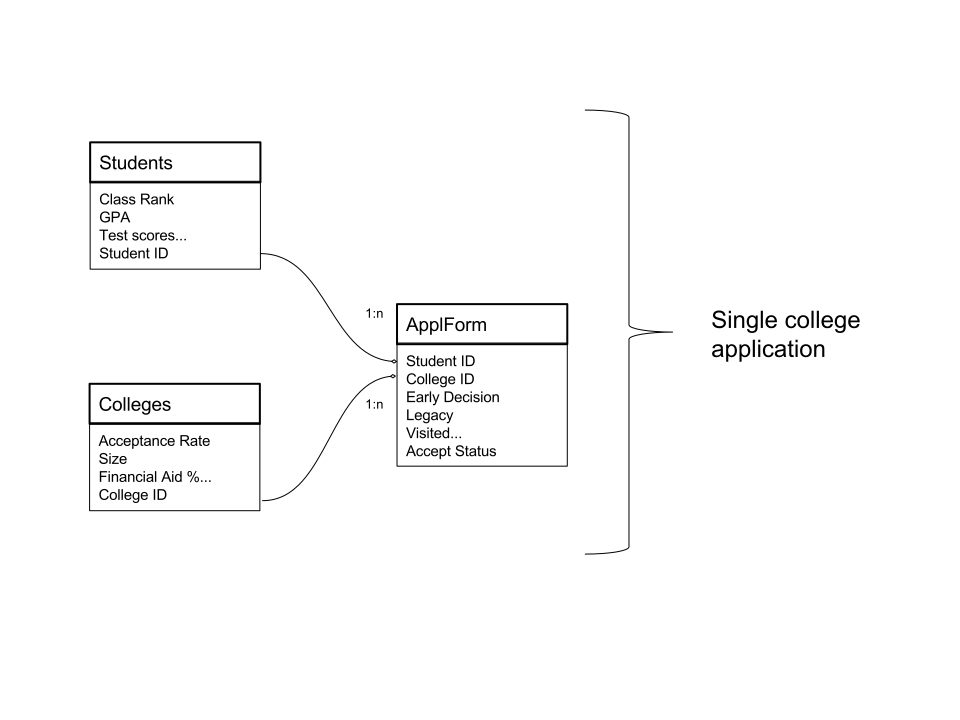

In [10]:
from IPython.display import SVG
SVG(filename='datamodel.svg')

<a id="studenttable"></a>
### The Student Table

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>#</th>
      <th>Factor</th>
      <th>Data Type</th>
      <th>Category</th>
      <th>Support</th>
      <th>Standardized?</th>
      <th>Pandas Name</th>
      <th>Comments</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Class Rank</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>classrank</td>
      <td>percentile, or could group by "top 10%" . For ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Admissions Test</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>admissionstest</td>
      <td>This is a combination of SAT and ACT, converte...</td>
    </tr>
    <tr>
      <th>2</th>
      <td># AP/IB/Other</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>AP</td>
      <td># tests taken</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Average AP/IB score</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>averageAP</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>SAT Subject</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>SATsubject</td>
      <td># tests taken</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Can Afford Tuition</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>canAfford</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>6</th>
      <td>GPA</td>
      <td>Numeric</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>GPA</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Weighted GPA</td>
      <td>Numerica</td>
      <td>academic</td>
      <td>R</td>
      <td>Y</td>
      <td>GPA_w</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Female</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>female</td>
      <td>-1 means male, 0 means unidentified</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Minority Gender/Sexuality</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>MinorityGender</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Minority Race</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>MinorityRace</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>11</th>
      <td>International</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>international</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>12</th>
      <td>First in Family</td>
      <td>Indicator</td>
      <td>personal</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>firstinfamily</td>
      <td>to go to ANY college</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Sporting Excellence</td>
      <td>Indicator</td>
      <td>non academic</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>sports</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Music / Performing Arts Excellence</td>
      <td>Indicator</td>
      <td>non academic</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>artist</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>15</th>
      <td>Which Program</td>
      <td>Factor</td>
      <td>academic</td>
      <td>n levels</td>
      <td>N</td>
      <td>program</td>
      <td>e.g. Sciences / Arts / Music / Undecided</td>
    </tr>
    <tr>
      <th>16</th>
      <td>Work Experience</td>
      <td>Indicator</td>
      <td>non academic</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>workexp</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>17</th>
      <td>Public/Private/Homeschool</td>
      <td>Factor</td>
      <td>academic</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>schooltype</td>
      <td>Highschool type: -1 is public, all values are ...</td>
    </tr>
    <tr>
      <th>18</th>
      <td>Intended Grad Year</td>
      <td>Numeric</td>
      <td>personal</td>
      <td>I</td>
      <td>N</td>
      <td>intendedgradyear</td>
      <td>Class of ?</td>
    </tr>
  </tbody>
</table>



<a id="collegetable"></a>
### The Colleges Table

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>#</th>
      <th>Factor</th>
      <th>Data Type</th>
      <th>Category</th>
      <th>Support</th>
      <th>Standardized?</th>
      <th>Pandas Name</th>
      <th>Comments</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>collegeID</td>
      <td>string</td>
      <td>college</td>
      <td>string</td>
      <td>N</td>
      <td>collegeID</td>
      <td>Unique key in the database</td>
    </tr>
    <tr>
      <th>1</th>
      <td>name</td>
      <td>string</td>
      <td>college</td>
      <td>string</td>
      <td>N</td>
      <td>name</td>
      <td>Friendly name</td>
    </tr>
    <tr>
      <th>2</th>
      <td>College Acceptance Rate</td>
      <td>Numeric</td>
      <td>college</td>
      <td>R</td>
      <td>Y</td>
      <td>acceptrate</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>College Size</td>
      <td>Numeric</td>
      <td>college</td>
      <td>R</td>
      <td>Y</td>
      <td>size</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Public/private</td>
      <td>Indicator</td>
      <td>college</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>public</td>
      <td>-1 private / parochial, 1 is public</td>
    </tr>
  </tbody>
</table>


<a id="applformtable"></a>
### The Application Form Table

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>#</th>
      <th>Factor</th>
      <th>Data Type</th>
      <th>Category</th>
      <th>Support</th>
      <th>Standardized?</th>
      <th>Pandas Name</th>
      <th>Comments</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Campus Visit / Interview</td>
      <td>Indicator</td>
      <td>application</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>visited</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Early</td>
      <td>Indicator</td>
      <td>application</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>earlyAppl</td>
      <td>Includes early action and early decision.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Acceptance Status</td>
      <td>Indicator</td>
      <td>application</td>
      <td>{-1,1}</td>
      <td>N</td>
      <td>acceptStatus</td>
      <td>did the student get in? -1 = rejected, 1= acce...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Acceptance Probability</td>
      <td>Numeric</td>
      <td>application</td>
      <td>R</td>
      <td>N</td>
      <td>acceptProb</td>
      <td>what is our forecast acceptance probability?</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Out of State</td>
      <td>Indicator</td>
      <td>application</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>outofstate</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Family Alumni</td>
      <td>Indicator</td>
      <td>application</td>
      <td>{-1,0,1}</td>
      <td>N</td>
      <td>alumni</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>


<a id="datamodelimpl"></a>
## Datamodel Implementation


The `TIdatabase.py` Python module encapsulates all loading, storing and joining of the student, college and applications dataframes.

The module is imported at the beginning of every relevant iPython Notebook.

The module provides a wrapper around a Pandas dataframe and utility functions to ensure referential integrity between the tables and loading and storing of persistent data.

The persistent storage we used was simply CSV files. This had a number of advantages:

* CSVs are easy to read, without platform or database connectivity issues.
* They are readily portable, which was key as the public website is effectively running on three different environments.
* They are compatible with Python, R and other tools such as Tableau so it was easy to import / export and perform analysis with a variety of tools.
* Since we were dealing with approximately 15,000 records, there was no need for a higher performance solution.


```
# TIdatabase.py - common database module
import string
import random as random
import pandas as pd
import numpy as np
import os


# Module globals
studentDF = None
collegeDF = None

class Student:
    def __init__(self):
        global studentDF
        self.keysize = 10
        self.factorcolumns = ['canAfford', 'female', 'MinorityGender','MinorityRace',
                              'international','firstinfamily','sports','artist', 'workexp','schooltype']
        self.columnlist = ['studentID','classrank', 'admissionstest','AP','averageAP',
                           'SATsubject', 'GPA', 'GPA_w', 'program',
                           'intendedgradyear', 'addInfo'] + self.factorcolumns
        if (studentDF is None):
            studentDF = pd.DataFrame(columns = self.columnlist)

        return

    def newstudentID(self):
        return ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(self.keysize))

    @property
    def df(self):
        global studentDF
        return studentDF

    @df.setter
    def df(self, df):
        global studentDF
        if not isinstance(df, pd.DataFrame):
            raise TypeError('Expected a Pandas DataFrame')
        studentDF = df

    def cleanup(self):
        """
        reinitialize all the globals
        """
        global studentDF
        studentDF = None

    def insertrow(self, row):
        global studentDF
        if (not isinstance(row,dict)):
            raise TypeError("only dicts can be used to insert")
        studentID = self.newstudentID()
        # check for a rare random collision until we get a unique value
        while (studentID in studentDF.studentID.values):
            studentID = self.newstudentID()
        row['studentID'] = studentID
        # Leave and missing indicator variables as NaN
        #This is how we would fill any missing indicator columns with 0's
        #---for c in self.factorcolumns:
        #---    if (not c in row):
        #---        row[c] = 0
        return row


    def insert(self,args):
        """
        Insert either a single row (when a dict is passed) or a list of rows
        """
        global studentDF
        rows = []
        newstudentIDs = [] 
        if (isinstance(args, dict)):
            newrow = self.insertrow(args)
            rows.append(newrow)
            newstudentIDs.append(newrow['studentID'])
        elif (isinstance(args, list)):
            for i in args:
                newrow = self.insertrow(i)
                rows.append(newrow)
                newstudentIDs.append(newrow['studentID'])
        else:
            raise TypeError("insert either a single dict or a list of dicts")
        studentDF = studentDF.append(rows)
        return newstudentIDs

    def read(self,filename):
        global studentDF
        studentDF = pd.read_csv(filename, index_col=0)

    def save(self,filename):
        global studentDF
        return studentDF.to_csv(filename)

    def fillRandom(self, nrows, nanpct = 0.0):
        global studentDF
        """
        populate the dataframe with n random rows.
        """
        for i in range(nrows):
            studentDF.loc[i] = [
                self.newstudentID(), # studentID
                random.random(), # classrank
                random.random(), # admissiontest
                random.random(), # AP
                random.random(), # averageAP
                random.random(), # SAT subject
                random.random(), # GPA
                random.random(), # Weighted GPA
                ''.join(random.choice(string.ascii_uppercase) for i in range(12)), #program
                random.randint(2009,2020), # grad year
                ''.join(random.choice(string.ascii_uppercase) for i in range(12)), #addInfo
                random.randint(0,1), # canAfford
                random.randint(0,1), # female
                random.randint(0,1), # MinorityGender
                random.randint(0,1), # MinorityRace
                random.randint(0,1), # international
                random.randint(0,1), # firstinfamily
                random.randint(0,1),  # sports
                random.randint(0,1),  # artist
                random.randint(0,1), # workexp
                random.randint(0,1) # schooltype
                ]
            # Randomly insert NaNs
            if (nanpct > 0.0):
                ncols = int( round(len(self.columnlist) * nanpct)) + 1
                if (ncols > len(self.columnlist)): ncols = len(self.columnlist) 
                for c in random.sample(self.columnlist, ncols):
                    if (c == 'studentID'): continue
                    studentDF.loc[i,c] = np.nan
            


class College:
    def __init__(self):
        global collegeDF
        collegeDF = pd.read_csv(os.path.join(os.path.dirname(__file__),"collegelist.csv"))
        #collegeDF = pd.DataFrame(columns = 
        #                              ['collegeID','name','acceptrate','size','public',
        #                               'finAidPct','instatePct'])
        return

    @property
    def df(self):
        global collegeDF
        return collegeDF

    @df.setter
    def df(self, df):
        global collegeDF
        if not isinstance(df, pd.DataFrame):
            raise TypeError('Expected a Pandas DataFrame')
        collegeDF = df



class ApplForm:
    """
    This contains an application for a given college and the results. Note that
    it is not global as it does not need to shared.
    """
    def __init__(self):
        global studentDF, collegeDF
        self.ApplFormDF = pd.DataFrame(columns =
                                       ['studentID','collegeID','earlyAppl','visited',
                                        'alumni', 'outofstate', 'acceptStatus','acceptProb'])

        return
    @property
    def df(self):
        return self.ApplFormDF

    @df.setter
    def df(self, df):
        if not isinstance(df, pd.DataFrame):
            raise TypeError('Expected a Pandas DataFrame')
        self.ApplFormDF = df

    
    def insertrow(self, row):
        global studentDF, collegeDF
        if (not isinstance(row,dict)):
            raise TypeError("only dicts can be used to insert")
        # check the foreign keys exist in studentDF and collegeDF
        if (row['studentID'] not in studentDF.studentID.values):
            raise KeyError("The studentID does not exist in StudentDF")
            return
        if (row['collegeID'] not in collegeDF.collegeID.values):
            raise KeyError("The collegeID does not exist in CollegeDF")
            return
        if (self.ApplFormDF.loc[(self.ApplFormDF['studentID'] == row['studentID']) & 
                                (self.ApplFormDF['collegeID'] == row['collegeID'])   , 'visited' ].count() != 0):
            raise KeyError("This combination of student and college already exists")
            return
        return row


    def insert(self,args):
        """
        Insert either a single row (when a dict is passed) or a list of rows
        """
        rows = []
        if (isinstance(args, dict)):
            rows.append(self.insertrow(args))
        elif (isinstance(args, list)):
            for i in args:
                rows.append(self.insertrow(i))
        else:
            raise TypeError("insert either a single dict or a list of dicts")
        self.ApplFormDF = self.ApplFormDF.append(rows)

    def read(self,filename):
        self.ApplFormDF = pd.read_csv(filename, index_col=0)

    def save(self,filename):
        return self.ApplFormDF.to_csv(filename)


    def fillRandom(self,nrows):
        global studentDF, collegeDF
        i = 0
        while (i < nrows):
            studentID = studentDF.sample(1).studentID.iloc[0]
            collegeID = collegeDF.sample(1).collegeID.iloc[0]
            # Make sure we don't have this combination already
            if (self.ApplFormDF.loc[(self.ApplFormDF['studentID'] == studentID) & 
                                    (self.ApplFormDF['collegeID'] == collegeID)   , 'visited' ].count() == 0): 
                # add in a new record
                self.ApplFormDF.loc[i] = [studentID, collegeID, 
                                          random.randint(0,1), # earlyAppl
                                          random.randint(0,1), # visited
                                          random.randint(0,1), # alumni
                                          random.randint(0,1), # outofstate
                                          random.randint(0,1), # acceptStatus
                                          random.random() # acceptProb
                                          ]
                i += 1

```





In [7]:
import TIdatabase as ti
%matplotlib inline 
import numpy as np
import pandas as pd

<a id="mockdata"></a>
### Generating Mock Data


The module has the functionality to fill the dataframes with mock data, which is useful to start writing  classification code before we finish scraping the actual data.

In [2]:
students = ti.Student()
# populate students with random values
students.fillRandom(10)
students.df 

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype
0,4C3D58VQ1W,0.937269,0.017293,0.472406,0.706897,0.249698,0.620290,0.649402,ANEJZJTNPUOQ,2014,...,0,0,0,1,0,0,0,0,0,0
1,8T9Y62WA7H,0.267864,0.140331,0.332548,0.608890,0.467065,0.580433,0.894877,TEXMWHNISWDT,2020,...,1,1,0,0,1,1,0,1,1,1
2,XLAJD22V90,0.213432,0.127882,0.630743,0.236496,0.790605,0.894352,0.664596,NZUFWBQACQJX,2015,...,0,0,1,1,1,0,1,1,1,0
3,WOH37EFMLQ,0.955141,0.844534,0.540052,0.494663,0.782603,0.156956,0.856083,YXXSWVDZABGL,2018,...,0,0,1,0,1,1,1,1,0,1
4,HUB0TQQFCX,0.261119,0.408293,0.729678,0.457731,0.415833,0.516840,0.446054,EXAGVPMQGXOV,2017,...,1,0,0,0,0,0,1,1,0,1
5,WER0RFYQ7O,0.583916,0.942943,0.352888,0.736917,0.490775,0.220707,0.185116,OKGQNPCAREDF,2011,...,1,1,1,1,0,0,1,0,1,1
6,8BUSVQPWS1,0.116513,0.299631,0.108969,0.889712,0.930085,0.412726,0.309639,XCTESHHPAXTW,2010,...,1,1,0,1,0,0,1,0,1,0
7,MPM8TXMRTM,0.523076,0.173017,0.686785,0.222811,0.690111,0.320245,0.127735,JBFMINERXLMN,2012,...,0,0,1,1,1,0,0,0,0,0
8,NW074XSZEA,0.549799,0.073715,0.231776,0.576724,0.461829,0.416853,0.176611,DOCUZJJFLRLA,2016,...,0,1,0,1,0,1,1,1,1,0
9,7NPHQ9B35J,0.998785,0.639999,0.270034,0.806570,0.344516,0.332635,0.769023,MQDRXSUJTFCS,2015,...,1,1,1,1,0,0,1,1,0,1


<a id="missingdata"></a>
### Simulating Missing Data

Missing data (NaNs) can be simulated to test the model's resiliancy and imputation. `fillRandom` takes a second optional parameter that is the percentage of NaNs to generate.

In [3]:
students.fillRandom(10, 0.25) # 25% of values will be NaN
students.df

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype
0,I7KVHE4KU2,NaN,0.411903,0.008926,NaN,0.697059,0.572459,0.719481,RLGBCUSTXUCN,2020,...,1,1,1,NaN,NaN,0,1,0,1,NaN
1,WUIKSS79U5,0.042739,0.978903,NaN,0.150814,0.888381,0.716432,0.319258,NaN,NaN,...,1,0,0,0,1,NaN,0,1,NaN,0
2,MCYRJXIWFT,NaN,0.676936,0.222222,0.750221,0.435927,NaN,NaN,NaN,2015,...,0,1,NaN,1,1,0,1,0,NaN,1
3,O4VFDETYW9,0.965210,0.349198,NaN,0.175502,0.763891,NaN,0.818600,BCBDNVKPDCQV,NaN,...,NaN,1,NaN,1,0,0,0,0,0,1
4,O7E962YCMY,0.757598,0.962523,0.153881,0.909159,0.387859,0.226433,NaN,NaN,NaN,...,1,1,0,0,NaN,NaN,0,1,1,1
5,M9F244XUR5,0.483674,0.225291,NaN,NaN,0.476892,0.978206,0.541648,NaN,2016,...,NaN,1,1,1,1,1,0,NaN,1,1
6,5LYSQ4GFVQ,0.631359,0.320407,NaN,0.147385,NaN,NaN,NaN,MQPKRUVKJGPM,NaN,...,0,0,0,1,0,1,0,NaN,0,0
7,GXS66NVNUG,NaN,0.015845,0.644829,0.096996,NaN,0.916329,0.419637,ZCEABHELGEOQ,2017,...,1,0,NaN,0,NaN,0,0,1,NaN,1
8,J6X17QNF10,0.670076,NaN,0.759936,0.939694,0.033866,0.352660,0.591305,JSKYJETELERO,2009,...,1,0,NaN,NaN,NaN,1,0,NaN,1,1
9,446NSBZTXL,NaN,0.062592,NaN,0.815695,0.376223,0.930515,0.044191,DJCCTTDPULKQ,NaN,...,1,0,NaN,0,1,NaN,0,0,1,0


Since we have a fixed list of only 25 colleges, the college information is not scraped.  The list of colleges is populated from a CSV stored in the same directory as this notebook. It can be edited using your favorite CSV editor, such as Excel. When you create a new instance of College, the values will be read in from the CSV. 

In [4]:
# populate with list of known colleges
colleges = ti.College()
colleges.df

,collegeID,name,acceptrate,size,public
0,Princeton,Princeton,0.074,5142,-1
1,Harvard,Harvard,0.060,19929,-1
2,Yale,Yale,0.063,12336,-1
3,Columbia,Columbia,0.070,24221,-1
4,Stanford,Stanford,0.051,16795,-1
5,UChicago,UChicago,0.088,12558,-1
6,MIT,MIT,0.079,11319,-1
7,Duke,Duke,0.114,15856,-1
8,UPenn,UPenn,0.104,21296,-1
9,CalTech,CalTech,0.088,2209,-1


The table of application forms combines a student with a university and carries the information of specific applications. `acceptStatus` is our predictor. `acceptProb` is our $\hat{Y}$ probability.

In [5]:
applForm = ti.ApplForm()
applForm.fillRandom(30)
applForm.df

,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,MCYRJXIWFT,Rice,1,0,0,1,0,0.840046
1,MCYRJXIWFT,UPenn,1,1,1,1,1,0.145205
2,446NSBZTXL,Stanford,1,0,0,1,1,0.051269
3,446NSBZTXL,Northwestern,1,0,1,0,1,0.455666
4,5LYSQ4GFVQ,USC,0,1,1,1,0,0.347317
5,O4VFDETYW9,Dartmouth,1,0,1,1,1,0.563783
6,O4VFDETYW9,Brown,0,0,0,1,0,0.768146
7,O4VFDETYW9,CarnegieMellon,0,1,0,0,0,0.922752
8,WUIKSS79U5,Emory,1,1,0,1,1,0.420219
9,GXS66NVNUG,USC,0,0,1,0,1,0.769272


To combine the student and application forms tables, we use Pandas merge capability, which will match rows by identical column names, which is studentID in this case:

In [6]:
applications = pd.merge(students.df,applForm.df)
applications

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,artist,workexp,schooltype,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,I7KVHE4KU2,NaN,0.411903,0.008926,NaN,0.697059,0.572459,0.719481,RLGBCUSTXUCN,2020,...,0,1,NaN,UChicago,0,0,1,0,0,0.419817
1,I7KVHE4KU2,NaN,0.411903,0.008926,NaN,0.697059,0.572459,0.719481,RLGBCUSTXUCN,2020,...,0,1,NaN,UCB,1,0,0,1,1,0.678585
2,WUIKSS79U5,0.042739,0.978903,NaN,0.150814,0.888381,0.716432,0.319258,NaN,NaN,...,1,NaN,0,Emory,1,1,0,1,1,0.420219
3,WUIKSS79U5,0.042739,0.978903,NaN,0.150814,0.888381,0.716432,0.319258,NaN,NaN,...,1,NaN,0,UPenn,0,1,1,1,0,0.439649
4,MCYRJXIWFT,NaN,0.676936,0.222222,0.750221,0.435927,NaN,NaN,NaN,2015,...,0,NaN,1,Rice,1,0,0,1,0,0.840046
5,MCYRJXIWFT,NaN,0.676936,0.222222,0.750221,0.435927,NaN,NaN,NaN,2015,...,0,NaN,1,UPenn,1,1,1,1,1,0.145205
6,MCYRJXIWFT,NaN,0.676936,0.222222,0.750221,0.435927,NaN,NaN,NaN,2015,...,0,NaN,1,Vanderbilt,1,0,1,1,1,0.335393
7,MCYRJXIWFT,NaN,0.676936,0.222222,0.750221,0.435927,NaN,NaN,NaN,2015,...,0,NaN,1,Georgetown,0,1,0,1,1,0.610308
8,MCYRJXIWFT,NaN,0.676936,0.222222,0.750221,0.435927,NaN,NaN,NaN,2015,...,0,NaN,1,Harvard,1,1,0,1,1,0.835352
9,O4VFDETYW9,0.965210,0.349198,NaN,0.175502,0.763891,NaN,0.818600,BCBDNVKPDCQV,NaN,...,0,0,1,Dartmouth,1,0,1,1,1,0.563783


Now the `applications` Pandas DataFrame is ready to use for either regression (by overwriting the acceptProb column) or building the public facing web site.

<a id="saving"></a>
## Saving Scraped Data

<a id="studentdata"></a>
### Part 1 - The Student Data

First, let's start fresh and delete the previously created objects. This is only necessary because this sample script is running within Jupyter where all variables are global to the page. In a separate Python file run from the command line, this step can be skipped. Creating a new instance would not work as behind the scenes, there is sharing of
DataFrames between objects.

In [7]:
if ('students' in locals()): 
    students.cleanup()
    del students
if ('applications' in locals()): del applications
if ('applForm' in locals()): del applForm


Let's create a new students instance. It will be an empty Pandas dataframe with the correct columns

In [8]:
students = ti.Student()
students.df

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype


Populate a dictionary with the values that the scraper has for a given row. Make sure the keys match up with the column names as only the matching columns will be saved. There is no need to add the studentID key. A unique value will be generated automatically and returned from the insert. This will be in the same order as the provided rows. Saving the generated student IDs will be helpful later when populating the applForm foreign key.

In [9]:

# Example: international male who scored in 98th percentile in ACT/SAT, went to a public school and is applying for
# Class of 2020

newrow = {'admissionstest': 0.98,
         'GPA': 4.5,
         'female' : -1,
         'international': 1,
         'schooltype': -1,
         'intendedgradyear':2020}

newsinglestudentID = students.insert(newrow)
print "New studentID:",newsinglestudentID
students.df

New studentID: ['QTMM0Z72NR']


,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype
0,QTMM0Z72NR,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2020,...,NaN,-1,NaN,NaN,1,NaN,NaN,NaN,NaN,-1


It is more efficient if multiple rows are added in one step. In this case, create a list of dictionaries and just
use the same method. Here, two new rows are added to the DataFrame in one step.

In [10]:
rows = []
a = {'schooltype': -1, 'admissionstest': 0.98, 'GPA': 4.5, 'female': 1, 'intendedgradyear': 2019, 'international': 0}
rows.append(a)
a = {'schooltype': 1, 'admissionstest': 0.65, 'GPA': 2.2, 'female': -1, 'intendedgradyear': 2019, 'international': 0}
rows.append(a)
newmanystudentIDs = students.insert(rows)
print "New studentIDs:",newmanystudentIDs
students.df

New studentIDs: ['8G1K66KS23', '7KB56K0JKT']


,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype
0,QTMM0Z72NR,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2020,...,NaN,-1,NaN,NaN,1,NaN,NaN,NaN,NaN,-1
0,8G1K66KS23,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2019,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,-1
1,7KB56K0JKT,NaN,0.65,NaN,NaN,NaN,2.2,NaN,NaN,2019,...,NaN,-1,NaN,NaN,0,NaN,NaN,NaN,NaN,1


Now we are ready to save. The data is saved in CSV format for ease of interpretability.

In [11]:
students.save("mydata.csv")

Let's delete all the data and check that we can read it back successfully.

In [12]:
if ('students' in locals()): 
    students.cleanup()
    del students
if ('applications' in locals()): del applications
if ('applForm' in locals()): del applForm



In [13]:
students = ti.Student()
students.read("mydata.csv")
students.df

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,canAfford,female,MinorityGender,MinorityRace,international,firstinfamily,sports,artist,workexp,schooltype
0,QTMM0Z72NR,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2020,...,NaN,-1,NaN,NaN,1,NaN,NaN,NaN,NaN,-1
0,8G1K66KS23,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2019,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,-1
1,7KB56K0JKT,NaN,0.65,NaN,NaN,NaN,2.2,NaN,NaN,2019,...,NaN,-1,NaN,NaN,0,NaN,NaN,NaN,NaN,1


Et, voilà, the data is back.

<a id="applicationdata"></a>
### Part 2 - The Application Data

This is pretty much the same, **except** for two important differences:

* The studentID and collegeID must both be populated and exist in the respective DataFrames
* The columns are a little different. Normally acceptProb would not be populated from the scraper but could be used to store prediction runs. 

In [14]:
# we already wiped out applForm above
applForm = ti.ApplForm()
applForm.df

,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb


In [15]:
# either pick one from the students.df DataFrame, like this:
#--- studentID = students.df.iloc[1].studentID
# or use the studentID from the insert in the students DataFrame
studentID = newsinglestudentID[0]
collegeID = colleges.df.iloc[1].collegeID

In [16]:
print studentID, collegeID

QTMM0Z72NR Harvard


In [17]:
newrow = {'studentID': studentID,
         'collegeID': collegeID,
         'earlyAppl' : 0,
         'visited': 0,
         'acceptStatus': 0}

applForm.insert(newrow)
applForm.df

,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,QTMM0Z72NR,Harvard,0,0,NaN,NaN,0,NaN


Now inserting multiple rows

In [18]:
rows = []
# either pick one randomly:
#--- studentID = students.df.iloc[2].studentID
# or use the list from the insert into the students DataFrame
# iterate over the list of newstudentIDs if necessary
studentID = newmanystudentIDs[0]
collegeID = colleges.df.iloc[2].collegeID
newrow = {'studentID': studentID,
         'collegeID': collegeID,
         'earlyAppl' : 0,
         'visited': 0,
         'acceptStatus': 0}
rows.append(newrow)
# note: same student, new school to apply to
studentID = students.df.iloc[2].studentID
collegeID = colleges.df.iloc[3].collegeID
newrow = {'studentID': studentID,
         'collegeID': collegeID,
         'earlyAppl' : 1,
         'visited': 1,
         'acceptStatus': 1}
rows.append(newrow)
applForm.insert(rows)
applForm.df

,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,QTMM0Z72NR,Harvard,0,0,NaN,NaN,0,NaN
0,8G1K66KS23,Yale,0,0,NaN,NaN,0,NaN
1,7KB56K0JKT,Columbia,1,1,NaN,NaN,1,NaN


Let's save it

In [19]:
applForm.save("applform1.csv")

Then delete the local variable

In [20]:
if ('applForm' in locals()): del applForm

Then read it back

In [21]:
applForm = ti.ApplForm()
applForm.read("applform1.csv")
applForm.df


,studentID,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,QTMM0Z72NR,Harvard,0,0,NaN,NaN,0,NaN
0,8G1K66KS23,Yale,0,0,NaN,NaN,0,NaN
1,7KB56K0JKT,Columbia,1,1,NaN,NaN,1,NaN


<a id="mergeddata"></a>

### Merging The Tables

And now let's check that the merge still works

In [22]:
applications = pd.merge(students.df,applForm.df)
applications

,studentID,classrank,admissionstest,AP,averageAP,SATsubject,GPA,GPA_w,program,intendedgradyear,...,artist,workexp,schooltype,collegeID,earlyAppl,visited,alumni,outofstate,acceptStatus,acceptProb
0,QTMM0Z72NR,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2020,...,NaN,NaN,-1,Harvard,0,0,NaN,NaN,0,NaN
1,8G1K66KS23,NaN,0.98,NaN,NaN,NaN,4.5,NaN,NaN,2019,...,NaN,NaN,-1,Yale,0,0,NaN,NaN,0,NaN
2,7KB56K0JKT,NaN,0.65,NaN,NaN,NaN,2.2,NaN,NaN,2019,...,NaN,NaN,1,Columbia,1,1,NaN,NaN,1,NaN


Now that the datamodel is implemented, the next step is to populate it with scraped data. 

<a id="scrape1"></a>
## First Scraping Attempt

Our first attempt at scraping was by downloading textual messages from a popular college message board called 
[College Confidential](http://www.collegeconfidential.com/). Given there are [millions of messages](http://talk.collegeconfidential.com/), we scraped the results of a popular thread called "Actual results" as this where students would self-report in detail their profile and results. In less than an hour, we were able to download 1000 threads containing over 30000 messages.

The resulting messages were stored in a JSON file for further parsing and examination.

In [5]:
# %load scrape/collegeconfidential/scrape.py
import requests
import json
import time
from bs4 import BeautifulSoup

MAXTHREADS = 10 # typically 1000 - reduced for this notebook

msgcount = 0 # global

def write_json(threads):
    global msgcount
    with open('messages.json','w') as outfile:
        json.dump(threads, outfile)
    print "Total:", len(threads), "threads,",msgcount,"messages"
    return

def read_thread(url):
    global msgcount
    req = requests.get(url)

    print url
    if req.status_code != 200:
	print "Could not reach site, Err=",req.status_code
	return
    
    soup = BeautifulSoup(req.text,"lxml")
    # extract time of posting
    itemHeader = soup.find("div", attrs={"class":"DiscussionHeader"})
    firstTime = itemHeader.find("time")['datetime']
    thread = { 'date': firstTime, 'url':url, 'messages':"" }

    #extract msgs
    for msg in soup.find("div",attrs={"class":"Message"}):
	if msg.string is not None:
            thread['messages'] += msg.string
            msgcount += 1
    #print "<EOM>"
    return thread

def search_msgs():
    # search for all messages with "actual results" in the message
    baseurl = "http://talk.collegeconfidential.com"
    req = requests.get(baseurl + "/search?adv=1&search=actual+results&title=&author=&cat=all&tags=&discussion_d=1&within=1+day&date=")
    maxthreads = MAXTHREADS
    results = []

    while (maxthreads > 0 and req.status_code == 200):
        soup = BeautifulSoup(req.text,"lxml")
        for item in soup.findAll("li", attrs={"class","Item-Search"}):
            url = item.findAll("h3")[0].find("a",href=True)['href']
            results.append(read_thread(url))
            maxthreads -= 1
            time.sleep(1)
        
        # get the next page of results
        nextpage = soup.find("a", attrs={"class","Next"},href=True)
        if not nextpage: break
        req = requests.get(baseurl + nextpage['href'])

    if req.status_code != 200:
        print "Could not search, Err=",req.status_code
        return
    else:
        print "Max threads reached or no additional threads found."


    write_json(results)
        

search_msgs()

#read_thread("http://talk.collegeconfidential.com/what-my-chances/1759670-actual-results-fall-2015-applicant-to-architecture-schools.html")


http://talk.collegeconfidential.com/what-my-chances/215577-can-more-graduated-seniors-do-actual-results-threads.html
http://talk.collegeconfidential.com/what-my-chances/1759670-actual-results-fall-2015-applicant-to-architecture-schools.html
http://talk.collegeconfidential.com/what-my-chances/1785125-actual-results-from-a-senior.html
http://talk.collegeconfidential.com/what-my-chances/1620042-actual-results-of-a-skeptical-ucla-bruin-hs-class-of-2013.html
http://talk.collegeconfidential.com/what-my-chances/1760316-senior-class-of-2019-actual-results-thread.html
http://talk.collegeconfidential.com/college-admissions/1811651-low-gpa-high-sat-actual-results.html
http://talk.collegeconfidential.com/what-my-chances/1640602-actual-results.html
http://talk.collegeconfidential.com/stanford-university/1833324-stanford-class-of-2020-rea-results-thread.html
http://talk.collegeconfidential.com/what-my-chances/682154-actual-results-of-applicant-for-the-class-of-13.html
http://talk.collegeconfidential

Here is an example of one of the messages:
    

> One current post lists a person's stats, what schools they applied to, and their results. This would be an even better alternative to someone randomly posting "can i get into cornell?"  We don't know, but looking at the stats of people who did and did not get in will help you make a more educated guess.
> 
> 
> 
> 
> See what I'm saying? So could more graduated seniors who just went through the process post their stats and results?  That would rock!  Thanks guys!!                
> 
> Hey everyone! I told myself I'd do this once I heard back from all of my schools. My journey through the college application process was a roller coaster I hope to never have to ride again. However, I'm really happy with where I've come since I started. My first SAT score was an 1850 - from there, I worked hard to raise my scores and prepare my applications, and I'm excited to share my results.
> 
> 
> 
> Here are my stats:
> 
> Objective:
> 
> ACT (breakdown) 33 (E: 35, M:31, R: 33, S: 33, W: 10/12)
> 
> SAT II: Chemistry:550 Math 2: 730
> 
> GPA: 3.94 UW/4.20 W
> 
> Rank (percentile if rank is unavailable): Top 10%
> 
> AP (Scores): AP Lang: 5
> 
> Senior Year Course Load: AP Literature, AP Environmental Science, Honors Calculus, AP European History, Architecture Studio II.
> 
> 
> 
> Misc/Awards:
> 
> Scholarship Award to attend Carnegie Mellon's Pre-College Architecture Program
> 
> High Pass grades awarded at CMU Arch Summer Program
> 
> Second Place in this year's National High School Architecture Competition
> 
> Participated in 5 school-wide poetry slams, hosted 1
> 
> Participated in art exposition
> 
> 
> 
> Subjective:
> 
> Extracurriculars:
> 
> -Activities Board within the Architecture Academy at my school (President - 2 years)
> 
> -Schoolwide Student Council (Officer - 4 years)
> 
> -Slam Poetry/Spoken Word Club (Founding Member - 3 years)
> 
> -Gender Equality Club (Founder - 1 year)
> 
> -Consumer Bowl (Co-Captain - 2 years)
> 
> -National Honor Society (elections TBA - 1 year)
> 
> -National Japanese Honor Society (3 years)
> 
> -Junior State of America (3 years)
> 
> 
> 
> Job/Work Experience:
> 
> -Intern/Teacher's Assistant for my school's health teacher.
> 
> -Held two part-time sales associate positions since the end of my sophomore year (15-20 hrs/week).
> 
> 
> 
> Volunteer/Community service: 200+ hours
> 
> 
> 
> Supplementary: Submitted a portfolio
> 
> Country (if international applicant):
> 
> State: New Jersey
> 
> School Type: Vocational
> 
> Ethnicity: South Asian
> 
> Gender: Male
> 
> Income Bracket: ~\$70,000
> 
> Hooks: Arch EC's/Major Architecture Award
> 
> 
> 
> SCHOOLS:
> 
> -Carnegie Mellon University
> 
> -Cornell University
> 
> -Lehigh University
> 
> -Princeton University
> 
> -Columbia University
> 
> -Washington University in St. Louis
> 
> -Northeastern University
> 
> -Illinois Institute of Tech
> 
> -NJIT
> 
> -Drexel University
> 
> 
> 
> ACCEPTED TO: Carnegie Mellon (top choice!!), Lehigh University, Northeastern University, Drexel University, Illinois Institute of Technology, NJIT
> 
> WAITLISTED AT: WashU
> 
> REJECTED AT: Cornell, Princeton, Columbia
> 
> 
> 
> Thanks for reading, and I hope this helps future applicants!
> 


Clearly this is a very rich dataset, as it presents a very complete picture of the candidate. However, it is challenging to parse and extract structured data like GPA and SAT scores given the nomenclature is not standard.

While grappling with this, we found a better source of structured data that would be a faster route to performing predictions, which is the subject of the next chapter.